# Powerball Analysis
***Powerball data that spans from 2/3/2010- 8/12/2024***

Here are some facts about Powerball. 
1. The first Powerball drawing took place on April 22, 1992.
2. It began with a format featuring a pool of 49 numbers.  
3. The current largest Powerball jackpot ever won was $2.04 billion on November 7, 2022.  
4. As of August 2024, Powerball is played in 45 states, as well as the District of Columbia, Puerto Rico, and the U.S. Virgin Islands.  

### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Powerball_numbers_8-14_updated.csv')
df.head()

,Draw Date,Main Numbers,Powerball,Multiplier
0,2/3/2010,17 22 36 37 52,24,2
1,2/6/2010,14 22 52 54 59,4,3
2,2/10/2010,05 08 29 37 38,34,5
3,2/13/2010,10 14 30 40 51,1,4
4,2/17/2010,07 08 19 26 36,15,3


In [3]:
df.tail()

,Draw Date,Main Numbers,Powerball,Multiplier
1661,8/3/2024,13 33 40 60 61,20,3
1662,8/5/2024,29 42 44 51 54,12,2
1663,8/7/2024,06 19 35 47 57,9,3
1664,8/10/2024,09 24 33 64 69,9,2
1665,8/12/2024,09 22 57 67 68,14,3


### Basic info on Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Draw Date     1666 non-null   object
 1   Main Numbers  1666 non-null   object
 2   Powerball     1666 non-null   int64 
 3   Multiplier    1666 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 52.2+ KB


In [5]:
df.describe()

,Powerball,Multiplier
count,1666.000000,1666.000000
mean,15.413565,2.442977
std,9.105061,1.441780
min,1.000000,0.000000
25%,8.000000,2.000000
50%,15.000000,2.000000
75%,23.000000,3.000000
max,39.000000,10.000000


### Let's look at the draw frequency rate of the Red Powerball numbers!  

From the start of this data set until January 2012, the available Red Powerball selection numbers reduced from 39 to 35.  
This was reduced further in October 2015, and is still current to a pool of 26 available number choices.  

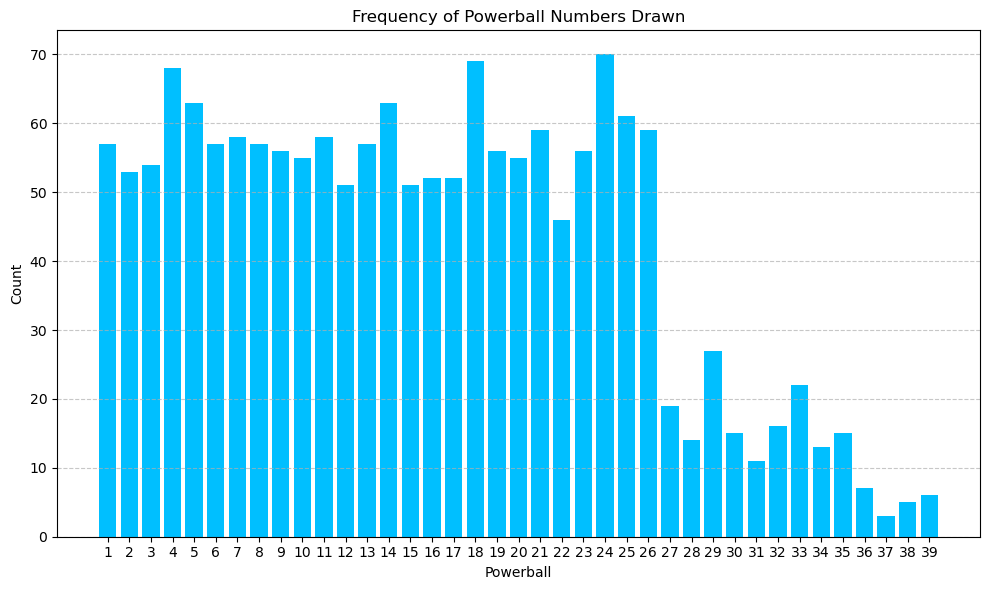

In [6]:
#value counts for the Powerball numbers and plot it for visual representation. 
powerball_counts = df['Powerball'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(powerball_counts.index, powerball_counts.values, color='deepskyblue')
plt.xlabel('Powerball')
plt.ylabel('Count')
plt.title('Frequency of Powerball Numbers Drawn')
plt.xticks(range(1, 40))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
powerball_freq = df['Powerball'].value_counts().sort_values()
powerball_freq

Powerball
37     3
38     5
39     6
36     7
31    11
34    13
28    14
30    15
35    15
32    16
27    19
33    22
29    27
22    46
12    51
15    51
17    52
16    52
2     53
3     54
20    55
10    55
19    56
9     56
23    56
13    57
1     57
6     57
8     57
7     58
11    58
21    59
26    59
25    61
5     63
14    63
4     68
18    69
24    70
Name: count, dtype: int64

### Now let's look at a breakdown of the main numbers drawn!  

Here is a time frame with the main White Ball number choice selections.   
1. November 1997 selection was 1-45.
2. March 2001 selection range increased 1-49.
3. August 2005 selection increased again to 55.
4. January 2009 continued with another increase, this time to 59.
5. October 2015 to current (*August 2024*), the available selection of main White Ball numbers changed once more, 1-69.   

In [8]:
#breakdown the main white ball numbers in groups of 10 and provide counts for each time drawn
df_main_split = df['Main Numbers'].str.split(' ', expand=True)
df_main_melted = df_main_split.melt(value_name='Number')
df_main_melted = df_main_melted.dropna()
df_main_melted['Number'] = df_main_melted['Number'].astype(int)

def group_number_range(number):
    return f"{((number - 1) // 10) * 10 + 1}-{((number - 1) // 10) * 10 + 10}"

df_main_melted['Range'] = df_main_melted['Number'].apply(group_number_range)

unique_ranges = sorted(df_main_melted['Range'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))

range_results = {}
for rng in unique_ranges:    
    range_data = df_main_melted[df_main_melted['Range'] == rng]    
    number_counts = range_data['Number'].value_counts().sort_index()    
    range_results[rng] = number_counts

for rng in unique_ranges:
    print(f"\nMain Number Counts for Range {rng}:")
    counts = range_results[rng]
    for number, count in counts.items():
        print(f"{number}: {count}")


Main Number Counts for Range 1-10:
1: 124
2: 123
3: 131
4: 118
5: 119
6: 122
7: 127
8: 123
9: 125
10: 133

Main Number Counts for Range 11-20:
11: 136
12: 136
13: 114
14: 129
15: 113
16: 127
17: 128
18: 121
19: 135
20: 134

Main Number Counts for Range 21-30:
21: 138
22: 132
23: 144
24: 127
25: 114
26: 109
27: 136
28: 140
29: 112
30: 126

Main Number Counts for Range 31-40:
31: 123
32: 144
33: 135
34: 111
35: 110
36: 152
37: 128
38: 127
39: 151
40: 130

Main Number Counts for Range 41-50:
41: 133
42: 118
43: 111
44: 133
45: 134
46: 110
47: 135
48: 118
49: 116
50: 122

Main Number Counts for Range 51-60:
51: 119
52: 131
53: 128
54: 137
55: 125
56: 124
57: 121
58: 122
59: 140
60: 68

Main Number Counts for Range 61-70:
61: 101
62: 87
63: 93
64: 90
65: 68
66: 79
67: 81
68: 84
69: 95


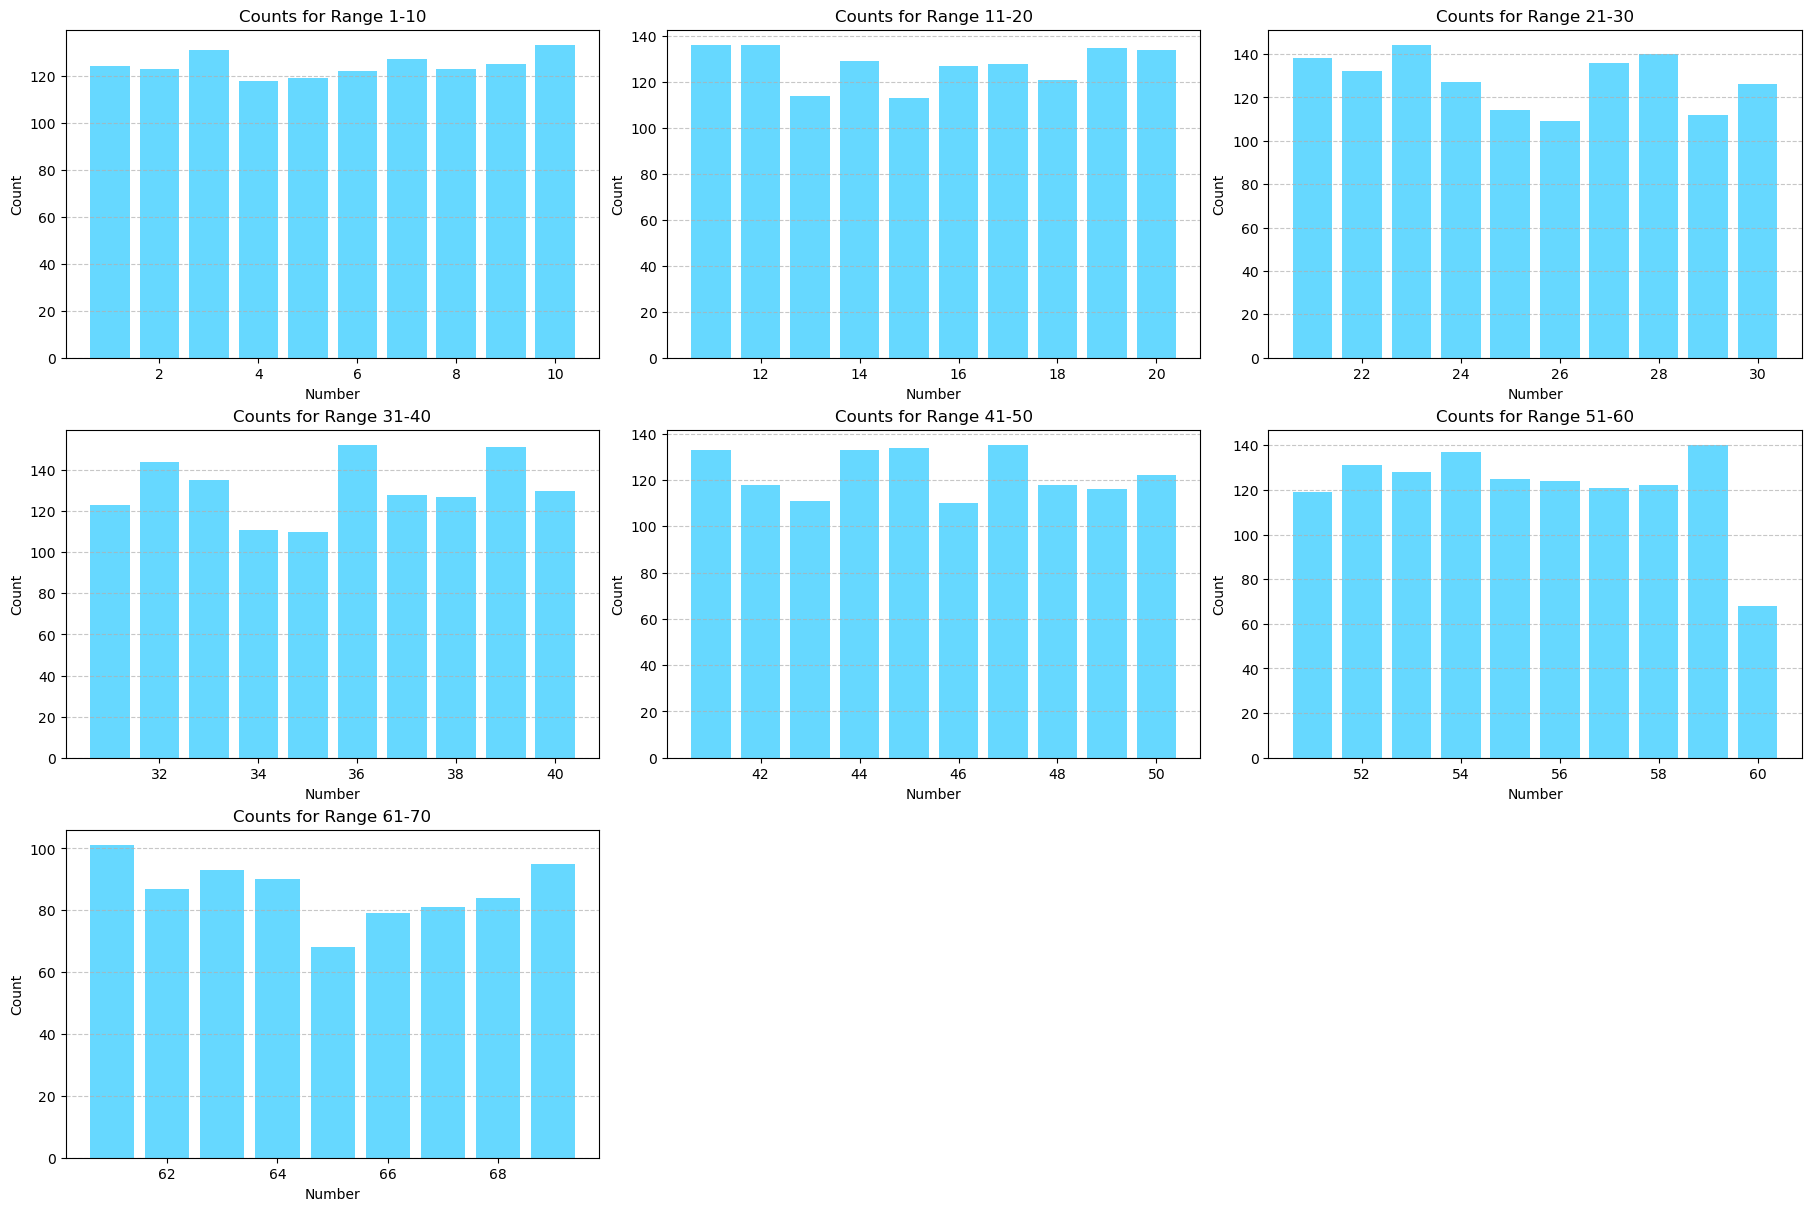

In [9]:
#provide the same information and plot it for visual representation
df_main_split = df['Main Numbers'].str.split(' ', expand=True)
df_main_melted = df_main_split.melt(value_name='Number')
df_main_melted = df_main_melted.dropna()
df_main_melted['Number'] = df_main_melted['Number'].astype(int)

def group_number_range(number):
    return f"{((number - 1) // 10) * 10 + 1}-{((number - 1) // 10) * 10 + 10}"

df_main_melted['Range'] = df_main_melted['Number'].apply(group_number_range)

unique_ranges = sorted(df_main_melted['Range'].unique(), key=lambda x: (int(x.split('-')[0]), int(x.split('-')[1])))

range_results = {}

for rng in unique_ranges:   
    range_data = df_main_melted[df_main_melted['Range'] == rng]    
    number_counts = range_data['Number'].value_counts().sort_index()     
    range_results[rng] = number_counts

# plot 
n_ranges = len(unique_ranges)
n_cols = 3  
n_rows = (n_ranges + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4), constrained_layout=True)

axes = axes.flatten()

for i, rng in enumerate(unique_ranges):
    counts = range_results[rng]
    ax = axes[i]
    ax.bar(counts.index, counts.values, color='deepskyblue', label=f'Range {rng}', alpha=0.6)
    ax.set_xlabel('Number')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts for Range {rng}')    
    ax.grid(axis='y', linestyle='--', alpha=0.7)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.show()

### Let's look into how many times each multiplier (*Power Play*) was drawn.

Note- there is a time in the data from 1/18/2012 thru 1/22/2014 that the multiplier for winnings was not in play. The missing data was replaced with a 0 to represent no multiplier available.       
Also, The Powerball multiplier, known as the Power Play, was increased to a 10x option starting on October 31, 2021 but suspended after October 31, 2022.  

In [10]:
multiplier_counts = df['Multiplier'].value_counts()
multiplier_counts

Multiplier
2     755
3     442
0     210
4     141
5     102
10     16
Name: count, dtype: int64

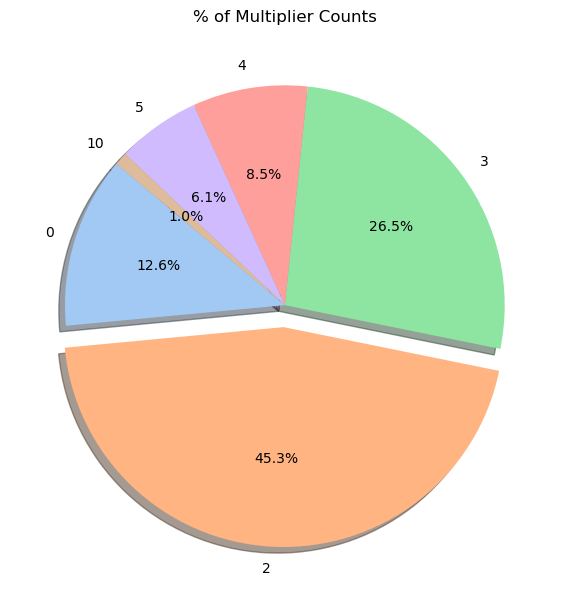

In [13]:
multiplier_counts = df['Multiplier'].value_counts().sort_index()

largest_slice_index = multiplier_counts.idxmax()
explode = [0.1 if label == largest_slice_index else 0 for label in multiplier_counts.index]
palette = sns.color_palette("pastel", len(multiplier_counts)) 
plt.figure(figsize=(6, 6))
plt.pie(multiplier_counts, labels=multiplier_counts.index, colors=palette,
        explode=explode, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('% of Multiplier Counts')
plt.tight_layout()
plt.show()